# Bernstein-Vazirani Problem Exploration

In this notebook we explore the Bernstein-Vazirani problem and respective quantum algorithm.
We will show that the Bernstein-Vazirani algorithm owes its existence to this mathematical identity, which has nothing to do with quantum mechanics
$$
\sum_{x=0}^{2^n-1}(-1)^{a\cdot x}(-1)^{y\cdot x} = \prod_{j=0}^{n-1}\sum_{x_j=0}^{1}(-1)^{(a_j+y_j)x_j} = \prod_{j=0}^{n-1}(1+(-1)^{(a_j+y_j)})
$$

and thanks, to the quantum entanglement, which is effected by Hadammard gates is able to find a secret number in 1 trial.

# The problem statement

Let a be an unknown integer such that $$a < {2^n}.$$

Let $$f(x) = {a\cdot x}=a_0x_0 \oplus a_1x_1 \oplus ... \oplus a_{n-1}x_{n-1}$$
is bitwise modulo-2 inner product function.

How many times we have to call f(x) to determine the unknown integer a?

## Classical Solution  - n different invocations of f(x)

Based on the fact that the m-th bit of the secretNumber is $${secretNumber \cdot 2^{m}}$$
so with a classical computer we can learn the n bits of the secretNumber by applying $$f(x)$$ to the n values $$x=2^{m}, 0<=m<2^{n}$$ 
In other words, we run n times
$$f(2^{m}), 0<=m<2^{n}$$
to find the secretNumber.

We will need some helper functions before we show the classical solution.

- Define function that does addition modulo 2, for example $$f(a,b) = a{\oplus}b.$$

In [1]:
def add_mod_2(x,y):
    return (x+y) % 2

- Define function that does bitwise modulo 2 Dot product for vectors a and b with n components
$$
{a\cdot b}=a_0b_0 \oplus a_1b_1 \oplus ... \oplus a_{n-1}b_{n-1}.
$$

In [2]:
print("1+1 = ",add_mod_2(1,1))
print("1+0 = ",add_mod_2(1,0))
print("0+1 = ",add_mod_2(0,1))
print("0+0 = ",add_mod_2(0,0))
print("8+3 = ",add_mod_2(8,3))
print("8+4 = ",add_mod_2(8,4))

1+1 =  0
1+0 =  1
0+1 =  1
0+0 =  0
8+3 =  1
8+4 =  0


In [3]:
def AdotMod2B(a,b):
    if len(a) != len(b):
        print("Lengths of a and b are not the same!")
        return -1
    r = a[0]*b[0]
    for i in range(len(a)-1):
        r = add_mod_2(r,a[i+1]*b[i+1])
    return r

In [4]:
a = [1,0,1,0,1,1,0,1]
b = [1,0,1,1,1,0,1,0]
AdotMod2B(a,b)

1

- Now, Classical solution.

In [5]:
secretNumber = '101101100101'

print("secretNumber = ",int(secretNumber, 2))

def ClassicalSolution(secretNumber):
    res = []
    temp = len(secretNumber)*'0'
    print(f'length of secretNumber: {len(secretNumber)}')
    secretN = [int(i) for i in secretNumber]
    for i in range(len(secretNumber)):
        rolling_num = [int(i) for i in temp]
        rolling_num[i]=1
        f_x = AdotMod2B(secretN,rolling_num)
        print(f'Invocation: {i+1:02} x = {rolling_num} f(x) = {f_x}')
        res.append(f_x)
    res_str = [str(i) for i in res]
    res_str = ''.join(res_str)
    return (secretNumber,res_str)
        
(a_bin,res) = ClassicalSolution(secretNumber)  

print(f'\n{len(secretNumber)} invocations of f(x)')
print('secretNumber = ',secretNumber)
print('found with f = ',res)

secretNumber =  2917
length of secretNumber: 12
Invocation: 01 x = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] f(x) = 1
Invocation: 02 x = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] f(x) = 0
Invocation: 03 x = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] f(x) = 1
Invocation: 04 x = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0] f(x) = 1
Invocation: 05 x = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0] f(x) = 0
Invocation: 06 x = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0] f(x) = 1
Invocation: 07 x = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] f(x) = 1
Invocation: 08 x = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0] f(x) = 0
Invocation: 09 x = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0] f(x) = 0
Invocation: 10 x = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0] f(x) = 1
Invocation: 11 x = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0] f(x) = 0
Invocation: 12 x = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] f(x) = 1

12 invocations of f(x)
secretNumber =  101101100101
found with f =  101101100101


## With a quantum computer a single invocation of the function is enough to determine the secretNumber, regradless how big n is!

- import necessary libraries

In [6]:
from qiskit import *

In [7]:
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

- we use the same secret number as in the above Classical Solution

In [8]:
secretNumber = '101101100101'
n = len(secretNumber)
print(f'n is {n}')
print("secretNumber = ",int(secretNumber, 2))

n is 12
secretNumber =  2917


- define respective quantum circuit

In [9]:
circuit = QuantumCircuit(n+1,n)

In [10]:
circuit.h([i for i in range(n)])
circuit.x(n)
circuit.h(n)

circuit.barrier()
reverse_secretNumber = secretNumber[::-1]
for i in range(n):
    if reverse_secretNumber[i] == '1':
        circuit.cx(i,n)
circuit.barrier()
circuit.h([i for i in range(n+1)])
circuit.measure([i for i in range(n)],[i for i in range(n)])

- draw the circuit

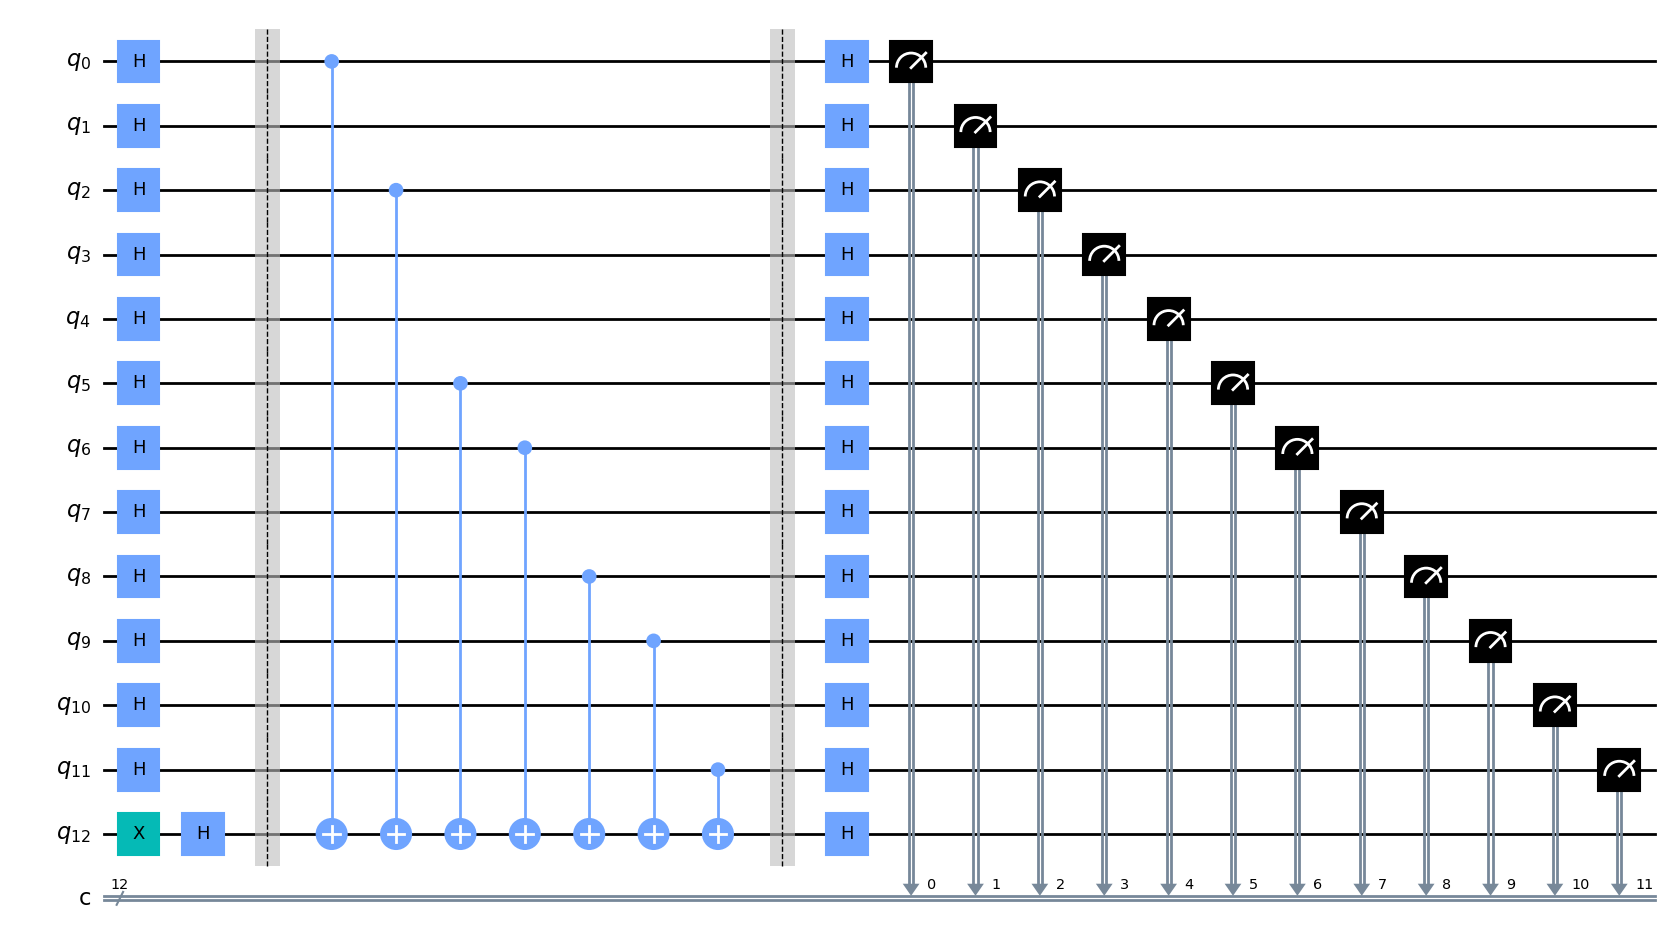

In [11]:
circuit.draw(output='mpl')

- 1 shot needed only to determine the secretNumber!

In [12]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
secretNumber = '101101100101'
print(counts)
print('secretNumber is')
print(f'  {secretNumber}')

{'101101100101': 1}
secretNumber is
  101101100101


# Mathematical analysis of the above quantum circuit

-  Let's first analyse the first part of the quantum circuit before the first barrier
<img src="images/Capture-first-part-VB.jpg">

It is useful to recall first how the Hadammard gate acts on |0> and |1> qubit states:
$$H|0> = {1/\sqrt{2}}(|0> + |1>)$$
$$H|1> = {1/\sqrt{2}}(|0> - |1>).$$
This can be compactly written as 
$$H|x> = {1/\sqrt{2}}(|0> + (-1)^x|1>)$$
where x is 0 or 1. 
This can also be expressed as
$$H|x> = {1/\sqrt{2}}(|0> + (-1)^x|1>) = {1/\sqrt{2}}\sum_{y=0}^{1}(-1)^{xy}|y>.$$
Now, if we apply H on first 12 qubits (n=12) $$q_0, q_1, ..., q_{11}$$ we get
$$H^{\otimes n}|q_0, q_1, ..., q_{11}>=H^{\otimes n}|x>_n={1/\sqrt{2}}\sum_{y_{n-1}=0}^{1}(-1)^{x_{n-1}y_{n-1}}|y_{n-1}>...{1/\sqrt{2}}\sum_{y_0=0}^{1}(-1)^{x_0y_0}|y_0>.$$
This can be further summarized as
$$H^{\otimes n}|x>_n=({1/2^{n/2}})\sum_{y_{n-1}=0}^{1}\sum_{y_{n-2}=0}^{1}...\sum_{y_0=0}^{1}(-1)^{{\sum_{j=0}^{n-1}}x_jy_j}|y_{n-1}>|y_{n-2}>...|y_0>$$
and finally as 
$$H^{\otimes n}|x>_n=({1/2^{n/2}})\sum_{y=0}^{2^{n}-1}(-1)^{x \cdot y}|y>_n$$
where 
$${x \cdot y} =x_0y_0 \oplus x_1y_1 \oplus ... \oplus x_{n-1}y_{n-1}.$$

For $$q_{12}$$
qubit we have $$HX|0>=H|1>={1/\sqrt{2}}(|0> - |1>)$$
and the quantum state of the system afer the first part of the quantum circuit before the first barrier is
$$(H^{\otimes n}\otimes H)|0>_n|1>=(({1/2^{n/2}})\sum_{x=0}^{2^{n}-1}|x>_n){1/\sqrt{2}}(|0> - |1>).$$
Here we applied 
$$H^{\otimes n}|0>_n=({1/2^{n/2}})\sum_{y=0}^{2^{n}-1}(-1)^{0 \cdot y}|y>_n=({1/2^{n/2}})\sum_{y=0}^{2^{n}-1}|y>_n.$$

- Now we analyze the second part that implements f(x). This is the standard unitary transformation $$U_f$$ for evaluation f(x).
<img src="images/Capture-second-part-VB.jpg">

- Let's convince ourself with few examples that the above circuit really implements $$f(x) = {a\cdot x}=a_0x_0 \oplus a_1x_1 \oplus ... \oplus a_{n-1}x_{n-1}.$$

For Example 1, a is secretNumber='101101100101' and let's set x='111000000000'. So f(x) should be 0.

Example 2: x = a then f(x) should be 1.

Example 3: x ='100000000000', f(x)=1.

In [13]:
# Example 1
a = [1,0,1,1,0,1,1,0,0,1,0,1]
b = [1,1,1,0,0,0,0,0,0,0,0,0]
AdotMod2B(a,b)

0

- The quantum circuit that implements this example

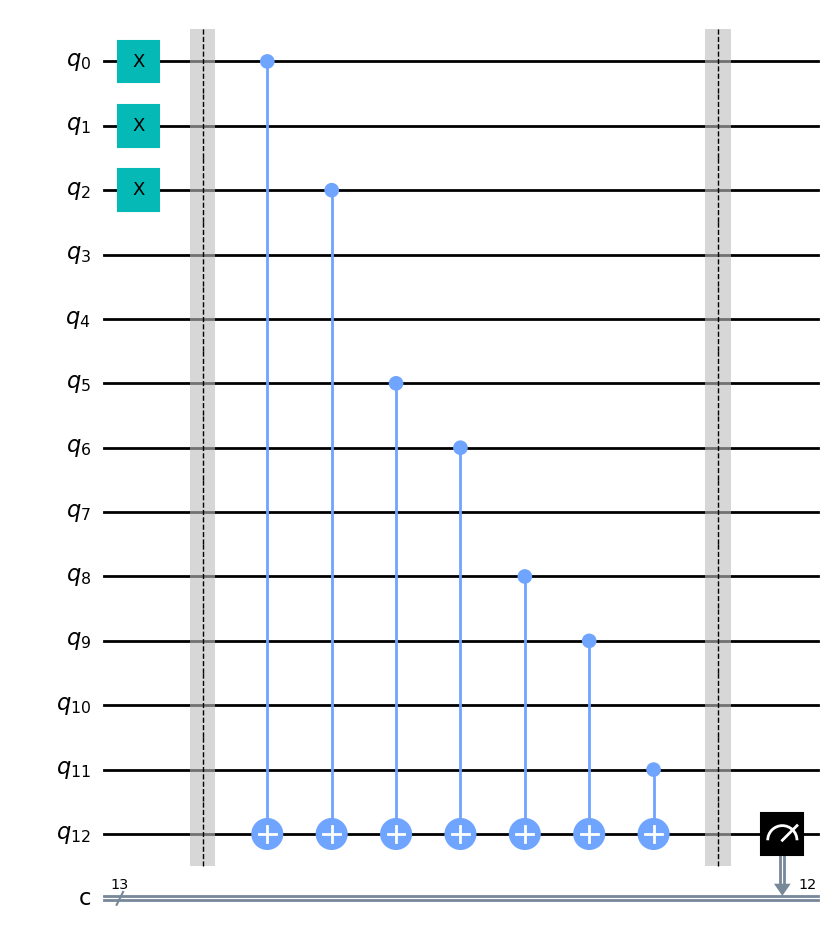

In [14]:
secretNumber = '101101100101'
n = len(secretNumber)

circuit2 = QuantumCircuit(n+1,n+1)
circuit2.x([i for i in range(3)])


circuit2.barrier()
reverse_secretNumber = secretNumber[::-1]
for i in range(n):
    if reverse_secretNumber[i] == '1':
        circuit2.cx(i,n)
circuit2.barrier()
circuit2.measure(n,n)

circuit2.draw(output='mpl')

In [15]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit2, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'0000000000000': 1}


In [16]:
# Example 2
a = [1,0,1,1,0,1,1,0,0,1,0,1]
b = [1,0,1,1,0,1,1,0,0,1,0,1]
AdotMod2B(a,b)

1

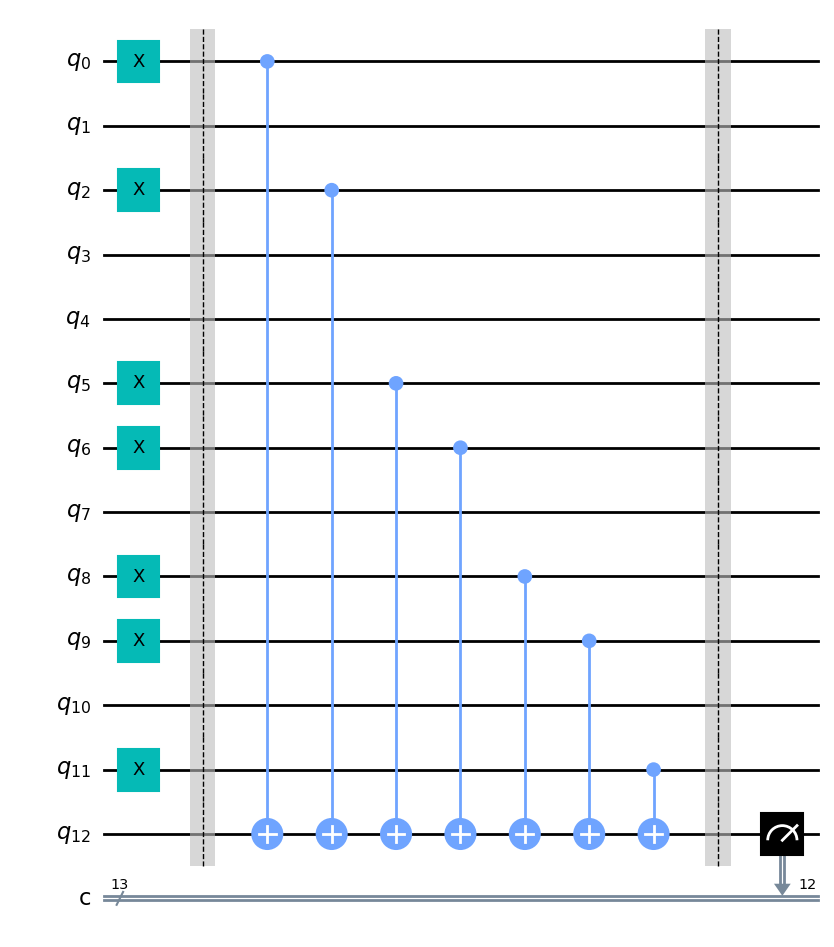

In [17]:
secretNumber = '101101100101'
n = len(secretNumber)
reverse_secretNumber = secretNumber[::-1]

circuit2 = QuantumCircuit(n+1,n+1)
for i in range(n):
    if reverse_secretNumber[i] == '1':
        circuit2.x(i)


circuit2.barrier()
for i in range(n):
    if reverse_secretNumber[i] == '1':
        circuit2.cx(i,n)
circuit2.barrier()
circuit2.measure(n,n)

circuit2.draw(output='mpl')

In [18]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit2, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'1000000000000': 1}


In [19]:
# Example 3
a = [1,0,1,1,0,1,1,0,0,1,0,1]
b = [1,0,0,0,0,0,0,0,0,0,0,0]
AdotMod2B(a,b)

1

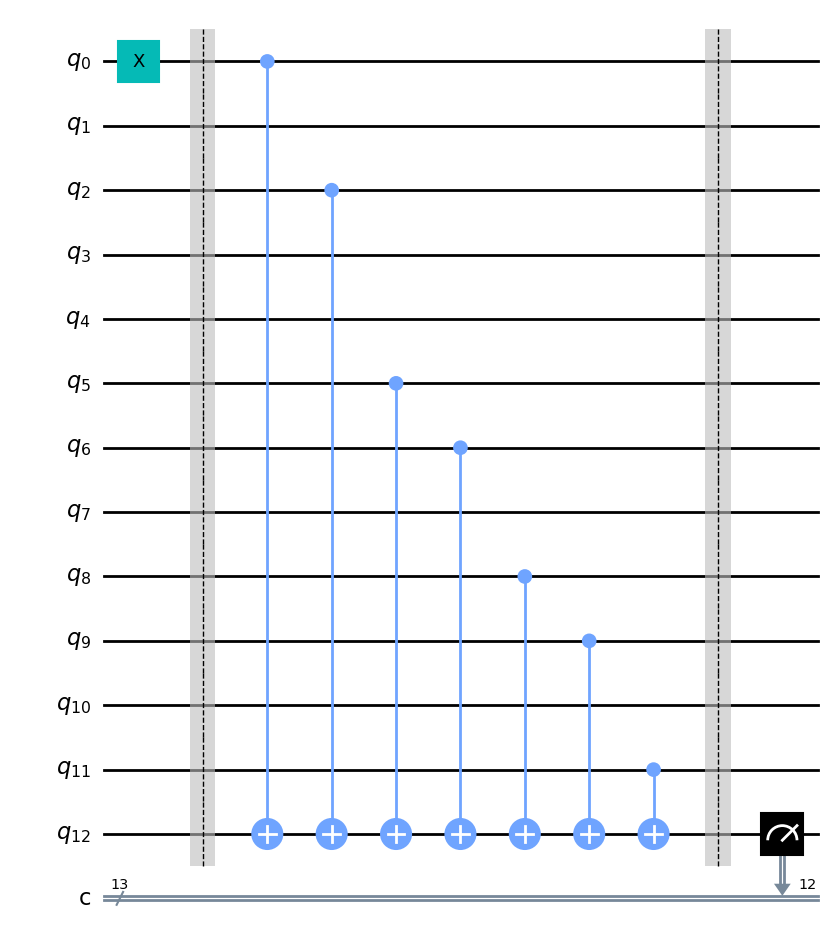

In [20]:
secretNumber = '101101100101'
n = len(secretNumber)

circuit2 = QuantumCircuit(n+1,n+1)
circuit2.x(0)


circuit2.barrier()
reverse_secretNumber = secretNumber[::-1]
for i in range(n):
    if reverse_secretNumber[i] == '1':
        circuit2.cx(i,n)
circuit2.barrier()
circuit2.measure(n,n)

circuit2.draw(output='mpl')

In [21]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit2, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'1000000000000': 1}


As we can see the above consecutive CNOT gates, as they are applied, either flip q12 bit or leave it as is, depending on which qubit X gate is applied, leaving in the end q12 bit in either |0> or |1> state. 

Going back to our Bernstein-Vazirani quantum circuit, $$U_f$$ is applied to
$$|x>_n{1/\sqrt{2}}(|0> - |1>)$$ state.
So, $$U_f|x>_n{1/\sqrt{2}}(|0> - |1>)=|x>_n{1/\sqrt{2}}(|0 \oplus f(x)> - |1 \oplus f(x)>).$$
If f(x)=0 we have
$$U_f|x>_n{1/\sqrt{2}}(|0> - |1>)=|x>_n{1/\sqrt{2}}(|0> - |1>).$$
For f(x)=1 case we have
$$U_f|x>_n{1/\sqrt{2}}(|0> - |1>)=|x>_n{1/\sqrt{2}}(|1> - |0>)=-|x>_n{1/\sqrt{2}}(|0> - |1>).$$

Obviously, we can address both of these cases in this compact form

$$U_f|x>_n{1/\sqrt{2}}(|0> - |1>)=(-1)^{f(x)}|x>_n{1/\sqrt{2}}(|1> - |0>).$$

It is easy now to see that
$$U_f(({1/2^{n/2}})\sum_{x=0}^{2^{n}-1}|x>_n){1/\sqrt{2}}(|0> - |1>)=({1/2^{n/2}})\sum_{x=0}^{2^{n}-1}(-1)^{f(x)}|x>_n{1/\sqrt{2}}(|0> - |1>)$$
where $$|x>_n$$  is n-bit binary representation of x.

-  Finally let's analyse the last part of the quantum circuit before the measurement.
<img src="images/Capture-third-part-VB.jpg">

We have
$$(H^{\otimes n}\otimes H)({1/2^{n/2}})\sum_{x=0}^{2^{n}-1}(-1)^{f(x)}|x>_n){1/\sqrt{2}}(|0> - |1>)=H^{\otimes n}({1/2^{n/2}})\sum_{x=0}^{2^{n}-1}(-1)^{f(x)}|x>_nH{1/\sqrt{2}}(|0> - |1>).$$

$$H{1/\sqrt{2}}(|0> - |1>)=|1>$$

$$H^{\otimes n}|x>_n=({1/2^{n/2}})\sum_{y=0}^{2^{n}-1}(-1)^{x \cdot y}|y>_n$$

So the final quantum state before the measurement is
$$({1/2^{n}})\sum_{x=0}^{2^{n}-1}\sum_{y=0}^{2^{n}-1}(-1)^{f(x)}(-1)^{x \cdot y}|y>_n|1>.$$

Since
$$f(x) = {a\cdot x}=a_0x_0 \oplus a_1x_1 \oplus ... \oplus a_{n-1}x_{n-1}$$
the final quantum state can be also written as
$$({1/2^{n}})\sum_{x=0}^{2^{n}-1}\sum_{y=0}^{2^{n}-1}(-1)^{a \cdot x}(-1)^{x \cdot y}|y>_n|1>.$$

Let's focus now on 
$$\sum_{x=0}^{2^{n}-1}(-1)^{a \cdot x}(-1)^{x \cdot y}.$$
This sum can be expressed as a product
$$
\sum_{x=0}^{2^n-1}(-1)^{a\cdot x}(-1)^{y\cdot x} = \prod_{j=0}^{n-1}\sum_{x_j=0}^{1}(-1)^{(a_j+y_j)x_j} = \prod_{j=0}^{n-1}(1+(-1)^{(a_j+y_j)}).
$$
Obviously if
$$a_j=y_j$$
for all j's,
which means when we do $$\sum_{y=0}^{2^{n}-1}$$
we will get to y=a case because under the problem assumption $$a < 2^n$$
then
$$\prod_{j=0}^{n-1}(1+(-1)^{(a_j+y_j)})=\prod_{j=0}^{n-1}2=2^n.$$
For all other y's, y is not equal to a so at least one bit in y is different to respective a bit and for that bit we have
$$(-1)^{(a_j+y_j)}=-1$$
and 
$$\prod_{j=0}^{n-1}(1+(-1)^{(a_j+y_j)})=0.$$
Therefore, the final quantum state reduces to
$$({1/2^{n}})\sum_{x=0}^{2^{n}-1}\sum_{y=0}^{2^{n}-1}(-1)^{a \cdot x}(-1)^{x \cdot y}|y>_n|1>=({1/2^{n}})\sum_{y=0}^{2^{n}-1}\sum_{x=0}^{2^{n}-1}(-1)^{a \cdot x}(-1)^{x \cdot y}|y>_n|1>=({1/2^{n}})\sum_{y=0}^{2^{n}-1}\prod_{j=0}^{n-1}(1+(-1)^{(a_j+y_j)})|y>_n|1>$$
and we get
$$({1/2^{n}})2^n|a>_n|1>=|a>_n|1>.$$

This is an incredible result! By single invocation of $$U_f$$ the final state of the first n qubit becomes |a> so measuring the first n qubits we will definitely reveal a. 

## Discussion

From above, it is clear that the Bernstein-Vazirani algorithm owes its existence to this mathematical identity which has nothing to do with quantum mechanics
$$
\sum_{x=0}^{2^n-1}(-1)^{a\cdot x}(-1)^{y\cdot x} = \prod_{j=0}^{n-1}\sum_{x_j=0}^{1}(-1)^{(a_j+y_j)x_j} = \prod_{j=0}^{n-1}(1+(-1)^{(a_j+y_j)})
$$

and, thanks to the quantum entanglement, which is effected by Hadammard gates is able to find a secret number in 1 trial. Without this mathematical identity is doubtful that the Bernstein-Vazirani algorithm would be able to find a secret number in 1 trial.
It seems Bernstein-Vazirani quantum circuit is designed to wrap up the above mathematical identity.

Below are some additional mathematical identities that are related to the structure of the above identity.

Orthogonality of Boolean Functions: $$ \sum_{x=0}^{2^{n}-1} (-1)^{a \cdot x} (-1)^{b \cdot x} = 2^n \cdot \delta(a, b), $$ where 
𝛿
(
𝑎
,
𝑏
)
 is the Kronecker delta, which equals 1 if 
𝑎
=
𝑏
 and 0 otherwise.

Parseval's Theorem for Walsh-Hadamard Transform: $$ \sum_{x=0}^{2^{n}-1} |(-1)^{f(x)}|2 = 2^{n+1}, $$ which ensures energy conservation in the Walsh-Hadamard domain.

Binary Convolution Identity: $$ \sum_{x=0}^{2^{n}-1} (-1)^{(a+b) \cdot x} = \prod_{j=0}^{n-1} (1 + (-1)^{a_j + b_j}), $$ which is a direct extension of our identity.

Fourier Transform Over Finite Fields: $$ \sum_{x \in \mathbb{F}_q} \chi(ax + by) = q \cdot \delta(a, b), $$ where 
𝜒
 is a character function over the finite field 
$${F}_q.$$

Inclusion-Exclusion Principle in Binary Form: $$ \prod_{j=0}^{n-1} (1 + (-1)^{a_j}) = \sum_{S \subseteq \{0, 1, \dots, n-1\}} (-1)^{|S|}, $$ which connects products and sums over subsets.

These identities are widely used in areas like coding theory, cryptography, and combinatorics.

It would be interesting to explore if these additional mathematical identities could be also wrapped up into some quantum circuits.

## Appendix

In this Appendix we verify
$$
\sum_{x=0}^{2^n-1}(-1)^{a\cdot x}(-1)^{y\cdot x} = \prod_{j=0}^{n-1}(1+(-1)^{(a_j+y_j)})
$$

First we show that $$(-1)^{x \oplus y} == (-1)^{x+y}.$$

Below we see True for all possibilities.

In [22]:
for x in [0,1,2,3,4]:
    for y in [0,1,2,3,4]:
        print(pow(-1,add_mod_2(x,y)) == pow(-1,x+y))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


- a small digression how to convert integer to binary

In [23]:
#convert integer to binary 
'{0:08b}'.format(6)

'00000110'

- Sum over x
$$
\sum_{x=0}^{2^n-1}(-1)^{a\cdot x}(-1)^{y\cdot x}
$$

In [24]:
def sum2Nminus1(n,a,y):
    s = 0
    for x in range(pow(2,n)):
        z = f'0:0{n}b'
        print("x =",x," ",('{'+z+'}').format(x))
        t = ('{'+z+'}').format(x) 
        #convert t to integer list
        x_v = [int(i) for i in t]
        x_v = x_v[::-1]
        s += pow(-1,AdotMod2B(a,x_v))*pow(-1,AdotMod2B(y,x_v))
    return s

- Product over x
$$
\prod_{j=0}^{n-1}(1+(-1)^{(a_j+y_j)})
$$

In [25]:
def prodNminus1(n,a,y):
    p = 1
    for j in range(n):
        p *= (1 + pow(-1,a[j]+y[j]))
    return p

- Finally, show now that
$$
\sum_{x=0}^{2^n-1}(-1)^{a\cdot x}(-1)^{y\cdot x} = \prod_{j=0}^{n-1}(1+(-1)^{(a_j+y_j)})
$$
We see True in below cells.

In [26]:
n=2
a=[0,1]
y=[0,1]
print(sum2Nminus1(n,a,y) == prodNminus1(n,a,y))

x = 0   00
x = 1   01
x = 2   10
x = 3   11
True


In [27]:
n=3
a=[0,1,1]
y=[0,1,1]
print(sum2Nminus1(n,a,y) == prodNminus1(n,a,y))

x = 0   000
x = 1   001
x = 2   010
x = 3   011
x = 4   100
x = 5   101
x = 6   110
x = 7   111
True


In [28]:
n=4
a=[0,1,1,1]
y=[0,1,1,1]
sum2Nminus1(n,a,y)
print(sum2Nminus1(n,a,y) == prodNminus1(n,a,y))

x = 0   0000
x = 1   0001
x = 2   0010
x = 3   0011
x = 4   0100
x = 5   0101
x = 6   0110
x = 7   0111
x = 8   1000
x = 9   1001
x = 10   1010
x = 11   1011
x = 12   1100
x = 13   1101
x = 14   1110
x = 15   1111
x = 0   0000
x = 1   0001
x = 2   0010
x = 3   0011
x = 4   0100
x = 5   0101
x = 6   0110
x = 7   0111
x = 8   1000
x = 9   1001
x = 10   1010
x = 11   1011
x = 12   1100
x = 13   1101
x = 14   1110
x = 15   1111
True


In [29]:
n=5
a=[0,1,1,1,0]
y=[0,1,1,1,0]
print(sum2Nminus1(n,a,y) == prodNminus1(n,a,y))

x = 0   00000
x = 1   00001
x = 2   00010
x = 3   00011
x = 4   00100
x = 5   00101
x = 6   00110
x = 7   00111
x = 8   01000
x = 9   01001
x = 10   01010
x = 11   01011
x = 12   01100
x = 13   01101
x = 14   01110
x = 15   01111
x = 16   10000
x = 17   10001
x = 18   10010
x = 19   10011
x = 20   10100
x = 21   10101
x = 22   10110
x = 23   10111
x = 24   11000
x = 25   11001
x = 26   11010
x = 27   11011
x = 28   11100
x = 29   11101
x = 30   11110
x = 31   11111
True


## References
1.Quantum Computer Science by N. David Mermin: https://www.cambridge.org/core/books/quantum-computer-science/66462590D10C8010017CF1D7C45708D7